# The Decision Tree Model

## Part 1: Data Processing
We begin by importing the `make_circles` method from sklearn. This method will generate a plot (like the one shown below) that gives us an example of the way data might behave in a **binary classfication** problem.

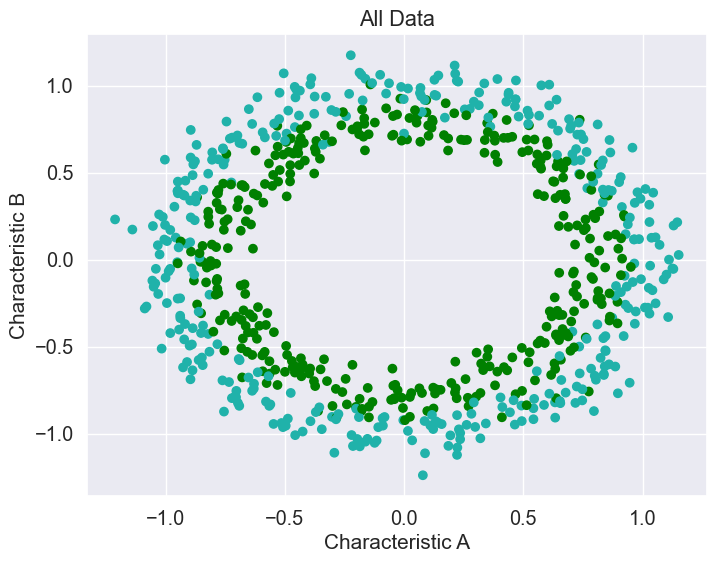

In [92]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions


#sklearn methods
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import classification_report

# The artificial data will be taken from sklearn (make_circles)
from sklearn.datasets import make_circles

# add noise, choose a seed value and number of samples
X, y = make_circles(n_samples = 750, noise = 0.08, random_state = 17)
shades = ["green" if label == 1 else "lightseagreen" for label in y]

# plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c = shades)
plt.xlabel("Characteristic A", fontsize = 15)
plt.ylabel("Characteristic B", fontsize = 15)
plt.title("All Data")
plt.grid(True)
plt.show()

As before, we will divide the dataset into training and testing data, and visualize it in the following" plot.

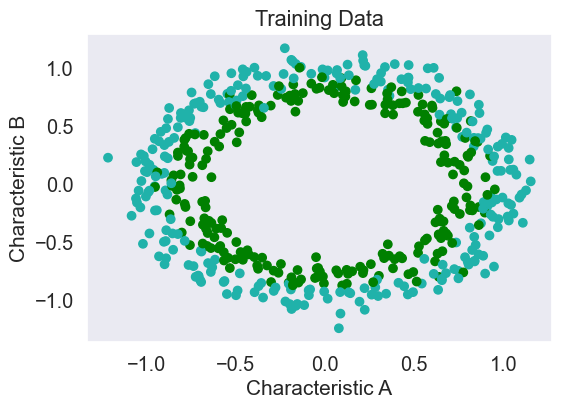

In [85]:
# partition dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3, 
                                                    random_state = 12)

train_shades = ["green" if label == 1 else "lightseagreen" for label in y_train]
test_shades = ["green" if label == 1 else "lightseagreen" for label in y_test]

plt.figure(figsize=(6, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c = train_shades)
plt.xlabel("Characteristic A", fontsize = 15)
plt.ylabel("Characteristic B", fontsize = 15)
plt.title("Training Data")
plt.grid()
plt.show()

## Part 2: Creating the Model

We next import `DecisionTreeClassifier` from `sklearn.tree` and create a decision tree. I chose a maximum depth of 3, meaning that there can be at most 3 splits in the tree from the root node to a leaf node.

In [86]:
tree = DecisionTreeClassifier(max_depth=3, random_state=9)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=9)

We can also visualize the inner workings of the tree. The `plot_tree` method below gives us an image showing how the classification rules evolve over the layers. We can see that our model does not lean strongly in either direction at any nodes until a couple of the decision nodes in the second layer, although there are still a few leaves with high gini scores (in other words, high impurity).

|--- typeA <= -0.87
|   |--- typeA <= -0.95
|   |   |--- class: 0
|   |--- typeA >  -0.95
|   |   |--- typeA <= -0.95
|   |   |   |--- class: 1
|   |   |--- typeA >  -0.95
|   |   |   |--- class: 0
|--- typeA >  -0.87
|   |--- typeB <= -0.87
|   |   |--- class: 0
|   |--- typeB >  -0.87
|   |   |--- typeA <= 0.83
|   |   |   |--- class: 1
|   |   |--- typeA >  0.83
|   |   |   |--- class: 0
 



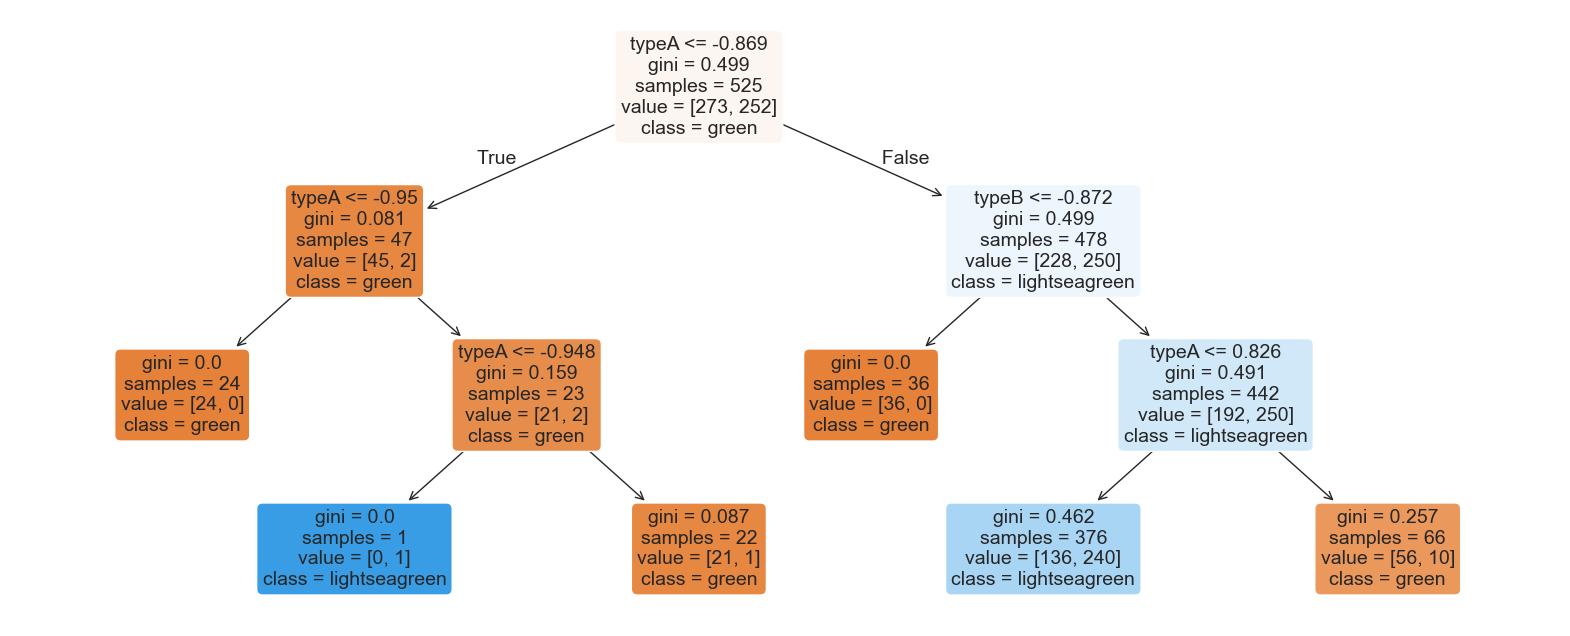

In [87]:
tree_rules = export_text(tree, feature_names = ["typeA", "typeB"])
print(tree_rules, "\n")

plt.figure(figsize=(20, 8))
a = plot_tree(tree, feature_names = ["typeA", "typeB"], class_names = ["green", "lightseagreen"], rounded = True, filled = True, fontsize=14)
plt.show()

Including more layers (see image below) does appear to generate more pure leaves- and this makes sense because more layers allows the model to split further on features and interactions between characteristics more precisely. Additionally, it creates smaller, more homogeneous groups (leaf nodes) that better reflect the target labels.

In [88]:
new_tree = DecisionTreeClassifier(max_depth=15, random_state=7)
new_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=7)

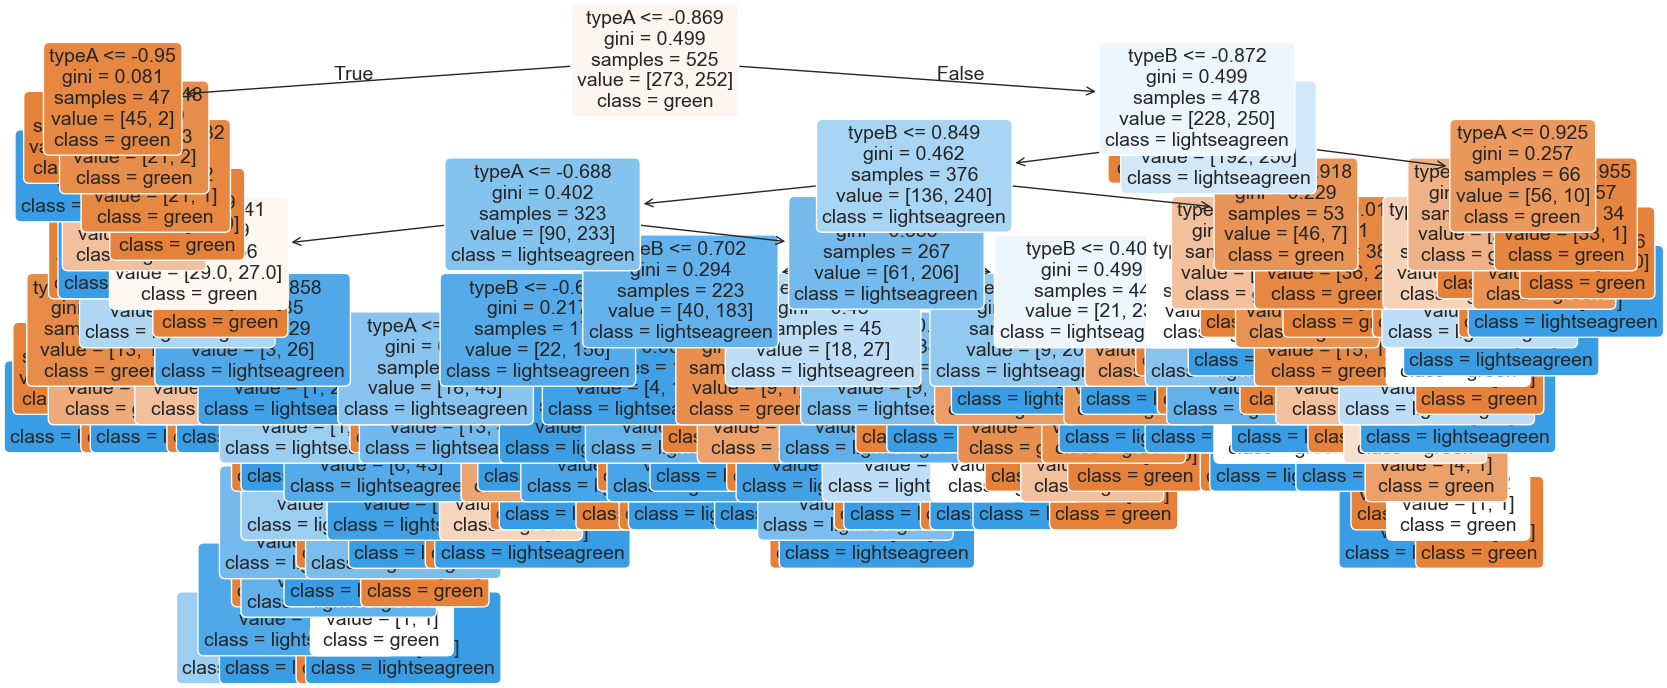

In [134]:
new_tree_rules = export_text(new_tree, feature_names = ["typeA", "typeB"])
# commented out the following line for brevity
#print(new_tree_rules, "\n")

plt.figure(figsize=(20, 8))
a = plot_tree(new_tree, feature_names = ["typeA", "typeB"], class_names = ["green", "lightseagreen"], rounded = True, filled = True, fontsize=14)
plt.show()

## Part 3: Analysis

Below we compare the two decision tree models. Clearly, the model with 15 layers outperforms the model with only 3, as it is able to form more nuanced bounds around the data points.

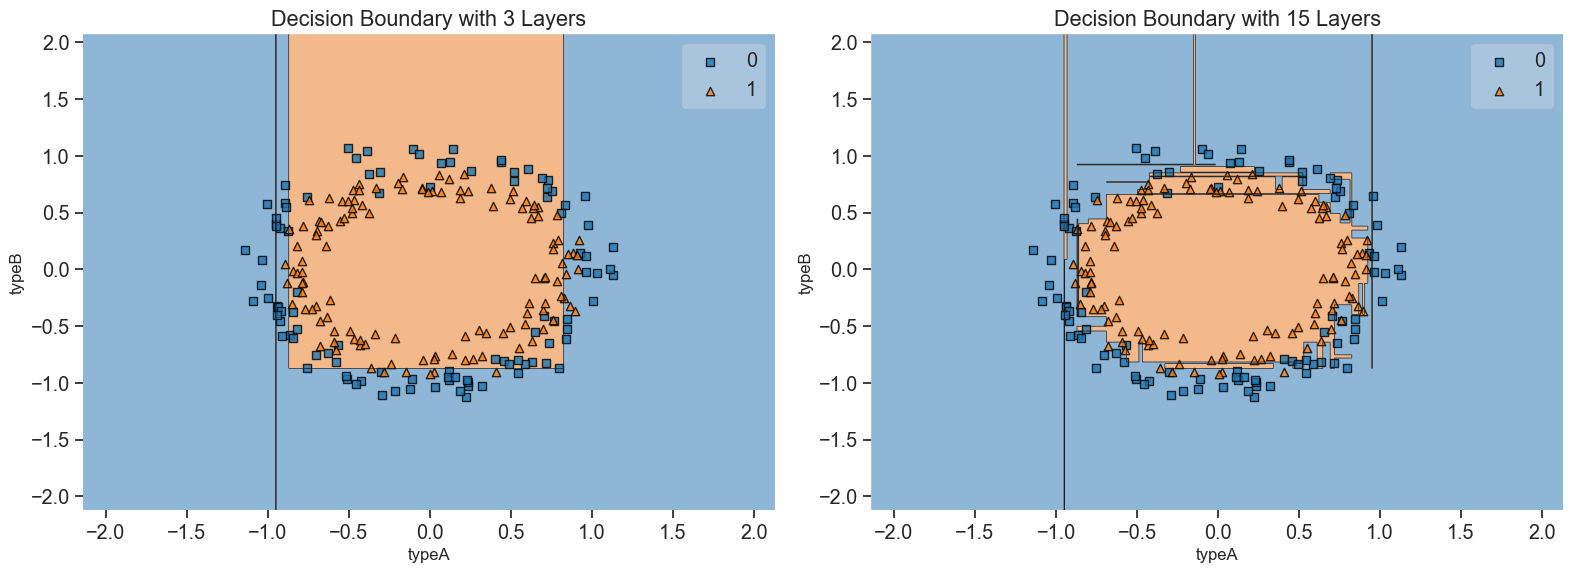

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First tree plot
plot_decision_regions(X_test, y_test, clf=tree, ax=axes[0])
axes[0].set_title("Decision Boundary with 3 Layers")
axes[0].set_xlabel("typeA", fontsize=12)
axes[0].set_ylabel("typeB", fontsize=12)
axes[0].grid()

# Second tree plot
plot_decision_regions(X_test, y_test, clf=new_tree, ax=axes[1])
axes[1].set_title("Decision Boundary with 15 Layers")
axes[1].set_xlabel("typeA", fontsize=12)
axes[1].set_ylabel("typeB", fontsize=12)
axes[1].grid()

plt.tight_layout()
plt.show()


Next, will will generate the confusion matrix for the each tree.

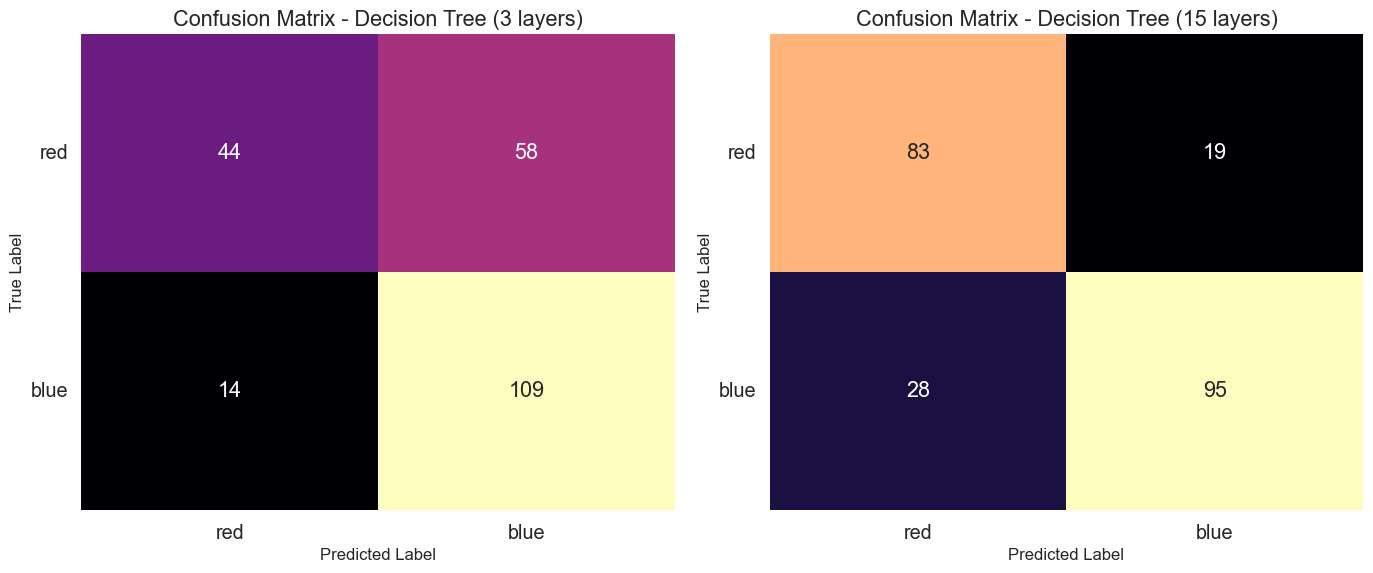

In [91]:
matrix1_df = pd.DataFrame(confusion_matrix1)
matrix2_df = pd.DataFrame(confusion_matrix2)

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set(font_scale=1.3)

# Plot first confusion matrix
sns.heatmap(matrix1_df, annot=True, fmt="g", cmap="magma", cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix - Decision Tree (3 layers)")
axes[0].set_xlabel("Predicted Label", fontsize=12)
axes[0].set_ylabel("True Label", fontsize=12)
axes[0].set_xticklabels(["red", "blue"])
axes[0].set_yticklabels(["red", "blue"], rotation=0)

# Plot second confusion matrix
sns.heatmap(matrix2_df, annot=True, fmt="g", cmap="magma", cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix - Decision Tree (15 layers)")
axes[1].set_xlabel("Predicted Label", fontsize=12)
axes[1].set_ylabel("True Label", fontsize=12)
axes[1].set_xticklabels(["red", "blue"])
axes[1].set_yticklabels(["red", "blue"], rotation=0)

plt.tight_layout()
plt.show()

In [95]:
y_pred = tree.predict(X_test)
y_pred2 = new_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.52      0.62       102
           1       0.69      0.87      0.77       123

    accuracy                           0.71       225
   macro avg       0.73      0.69      0.69       225
weighted avg       0.72      0.71      0.70       225

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       102
           1       0.87      0.85      0.86       123

    accuracy                           0.85       225
   macro avg       0.85      0.85      0.85       225
weighted avg       0.85      0.85      0.85       225



As expected, the tree with 15 layers is significantly more accurate than the tree with only 3. However, with 85% accuracy, the more compex tree still has much room for improvement. I believe this difficulty with categorizing the data, despite its low noise value (initialized in the first code cell as 0.08), is because of the pattern of the data. Because the data is arranged in concentric circles, even a small amount of noise creates a lot of overlap, and it's clear from the first plot that the data is not easily separable.

# Regression Tree Model

For the regression model, we will use a method from sklearn to generate our own data. This data will consist of 5,000 samples with 6 features each.

In [121]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=5000, n_features=6, noise=1, random_state=13)

# scaling both X and y data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

In [123]:
# create model
model = DecisionTreeRegressor(max_depth=5)

# divide data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state = 12)

# train model
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

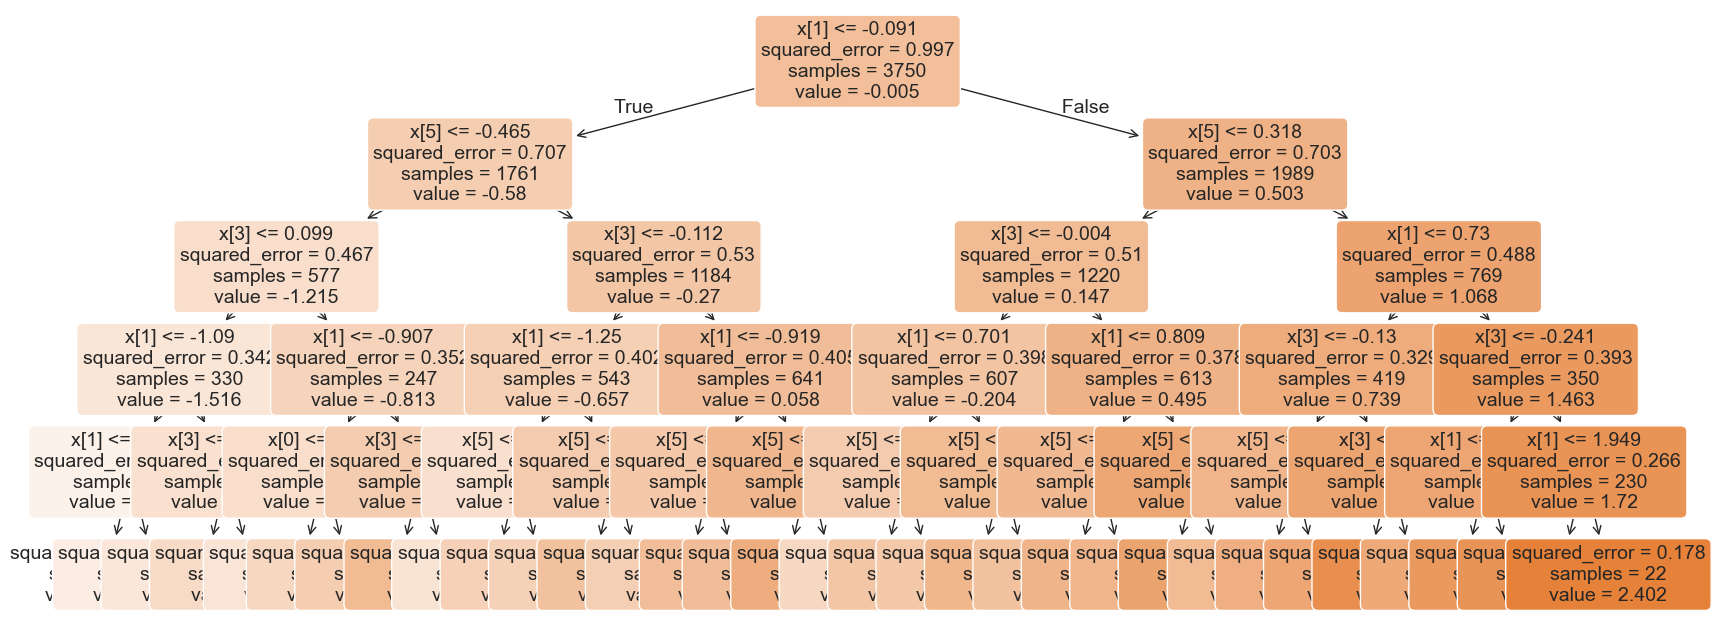

In [132]:
# visualize tree
plt.figure(figsize=(20,8))
a = plot_tree(model,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

Now we will create two models with vastly different numbers of layers and compare their MSE. As shown below, the model with 15 layers vastly outperforms the simpler model- but this is not suprising as we have seen this behavior before in the decision tree.

In [133]:
model1 = DecisionTreeRegressor(max_depth=3, random_state = 13)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(f"MSE model1: {mean_squared_error(y_test, y_pred)} \n")


model2 = DecisionTreeRegressor(max_depth=15, random_state = 13)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(f"MSE model2: {mean_squared_error(y_test, y_pred)} \n")


MSE model1: 0.4187619008700012 

MSE model2: 0.09440466119960252 



## Conclusion

- The decision tree model does a decent job at classifying the circle data, and although it still struggles, increasing the number of layers helps improve accuracy. However, from the decision boundary plot with 15 layers we can see the dangers of overfitting as there are several  abnormal shapes that could be causing errors.
- The regression tree model performs better, and we can see in the image above a nearly smooth gradient across the values. This model further illustrates the benefit of more layers as MSE reduces from 0.42 to 0.09 with an increase in layers.